<a href="https://colab.research.google.com/github/mjag7682/CS9-1-NLP-for-Twitter-Data-for-predicting-stocks/blob/master/Naive_Bayes_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import re

Mountig Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

Load the StockTwits dataset

In [ ]:
# df_comb = pd.read_csv('/content/drive/My Drive/Traditional Models Implementation/Combined_percentage_labelled.csv')
# df = pd.read_csv('/content/drive/My Drive/Data/Combined_FAANG_percentage_2.2.csv', sep=',')
df = pd.read_csv('/content/drive/My Drive/Data/Combined_FAANG_binary_previous.csv', sep=',')
df = df[df['message'].notna()]

Limit data for last 1 year

In [ ]:
df.drop(df[df['Date'] <= '2019-07-20'].index, inplace = True) 
df

,symbol,message,datetime,user,message_id,Date,Time,label
3,AAPL,aapl,2020-01-27 07:07:03,1229493.0,191978042.0,2020-01-27,07:07:03,0
8,AAPL,qq became euphoric calls exp week aiming ath f...,2020-05-13 02:13:00,2250451.0,212222428.0,2020-05-13,02:13:00,0
9,AAPL,spy novices like davey day trader lose money s...,2020-06-24 11:12:09,543250.0,222404886.0,2020-06-24,11:12:09,0
10,AAPL,today aapl shows buy signal ta short term tech...,2019-09-11 09:33:43,700679.0,176835918.0,2019-09-11,09:33:43,1
11,AAPL,aapl let melt begin,2020-01-03 16:46:16,741099.0,188910094.0,2020-01-03,16:46:16,0
...,...,...,...,...,...,...,...,...
2566840,NFLX,hope aside nyt putting also cnbc puts nflx take,2019-09-21 21:49:00,2807876.0,178253955.0,2019-09-21,21:49:00,0
2566841,NFLX,amd msft nflx everything beautiful 39 way,2020-03-06 06:06:03,911299.0,198589415.0,2020-03-06,06:06:03,0
2566848,NFLX,nflx full move key support,2020-03-12 16:52:43,677915.0,199933357.0,2020-03-12,16:52:43,0
2566849,NFLX,spy spx nflx nvda virtually volume today absen...,2019-10-14 18:16:28,55818.0,180328889.0,2019-10-14,18:16:28,1


Drop Neutral label

In [ ]:
df.drop(df[df['label']==0].index, inplace= True)
df['label'].replace({-1:0}, inplace = True)

In [ ]:
df["label"].value_counts()

1    283388
0    230965
Name: label, dtype: int64

In [ ]:
df = df.sample(frac=1)

##Train and predict

Splitting dataset to 90-10

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.1, random_state=42)

In [ ]:
x_train

1276416    amzn amazon 39 antitrust scrutiny spreads aws ...
1063090    aapl thing literally rallied sold calls n boug...
1519498    amzn weekly straddle may order big china news ...
1783569                                                   fb
362416       aapl cnbc playing dirty game apple trust saying
                                 ...                        
779561     aapl googl 47 sec ago grab singtel team singap...
1757696                                          fb wow moon
1877633    apple also open sourced homekit would bet anyt...
2290411    growth latin america matters netflix aapl dis ...
687696     msft panic selling loose money waiting 1 month...
Name: message, Length: 462917, dtype: object

In [ ]:
x_test

1632371           amzn selling right mean person crying face
733402                                              spy aapl
1861421    source fit sale googl fitbit started think sel...
1218403               fb aapl amzn nflx googl buying nothing
816614     aapl apple inc nasdaq aapl plans pay hundreds ...
                                 ...                        
1286489    spy I known jeff 15 years terrific guy trump t...
1708499          fly intel watch facebook earnings report fb
1113015    aapl profit margin 21 35 amongst best returns ...
1597472                                   amzn next leg soon
977556           ptn aapl volume picks price pattern healthy
Name: message, Length: 51436, dtype: object

##Grid Search

Defining the parameters for GridSearch

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
text_pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuning_param = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 0.1,0.2,0.3,0.4,0.5 ]
}

##Naive Bayes

Model Training

In [ ]:
from sklearn.metrics import classification_report
score = 'f1_macro'
model = GridSearchCV(text_pipe, tuning_param, cv=5, scoring=score)
model.fit(x_train, y_train)

print(classification_report(y_test, model.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.5621    0.4276    0.4857     23091
           1     0.6098    0.7286    0.6639     28345

    accuracy                         0.5935     51436
   macro avg     0.5859    0.5781    0.5748     51436
weighted avg     0.5884    0.5935    0.5839     51436



In [ ]:
model.best_params_

{'clf__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': True,
 'vect__ngram_range': (1, 2)}

In [ ]:
model.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

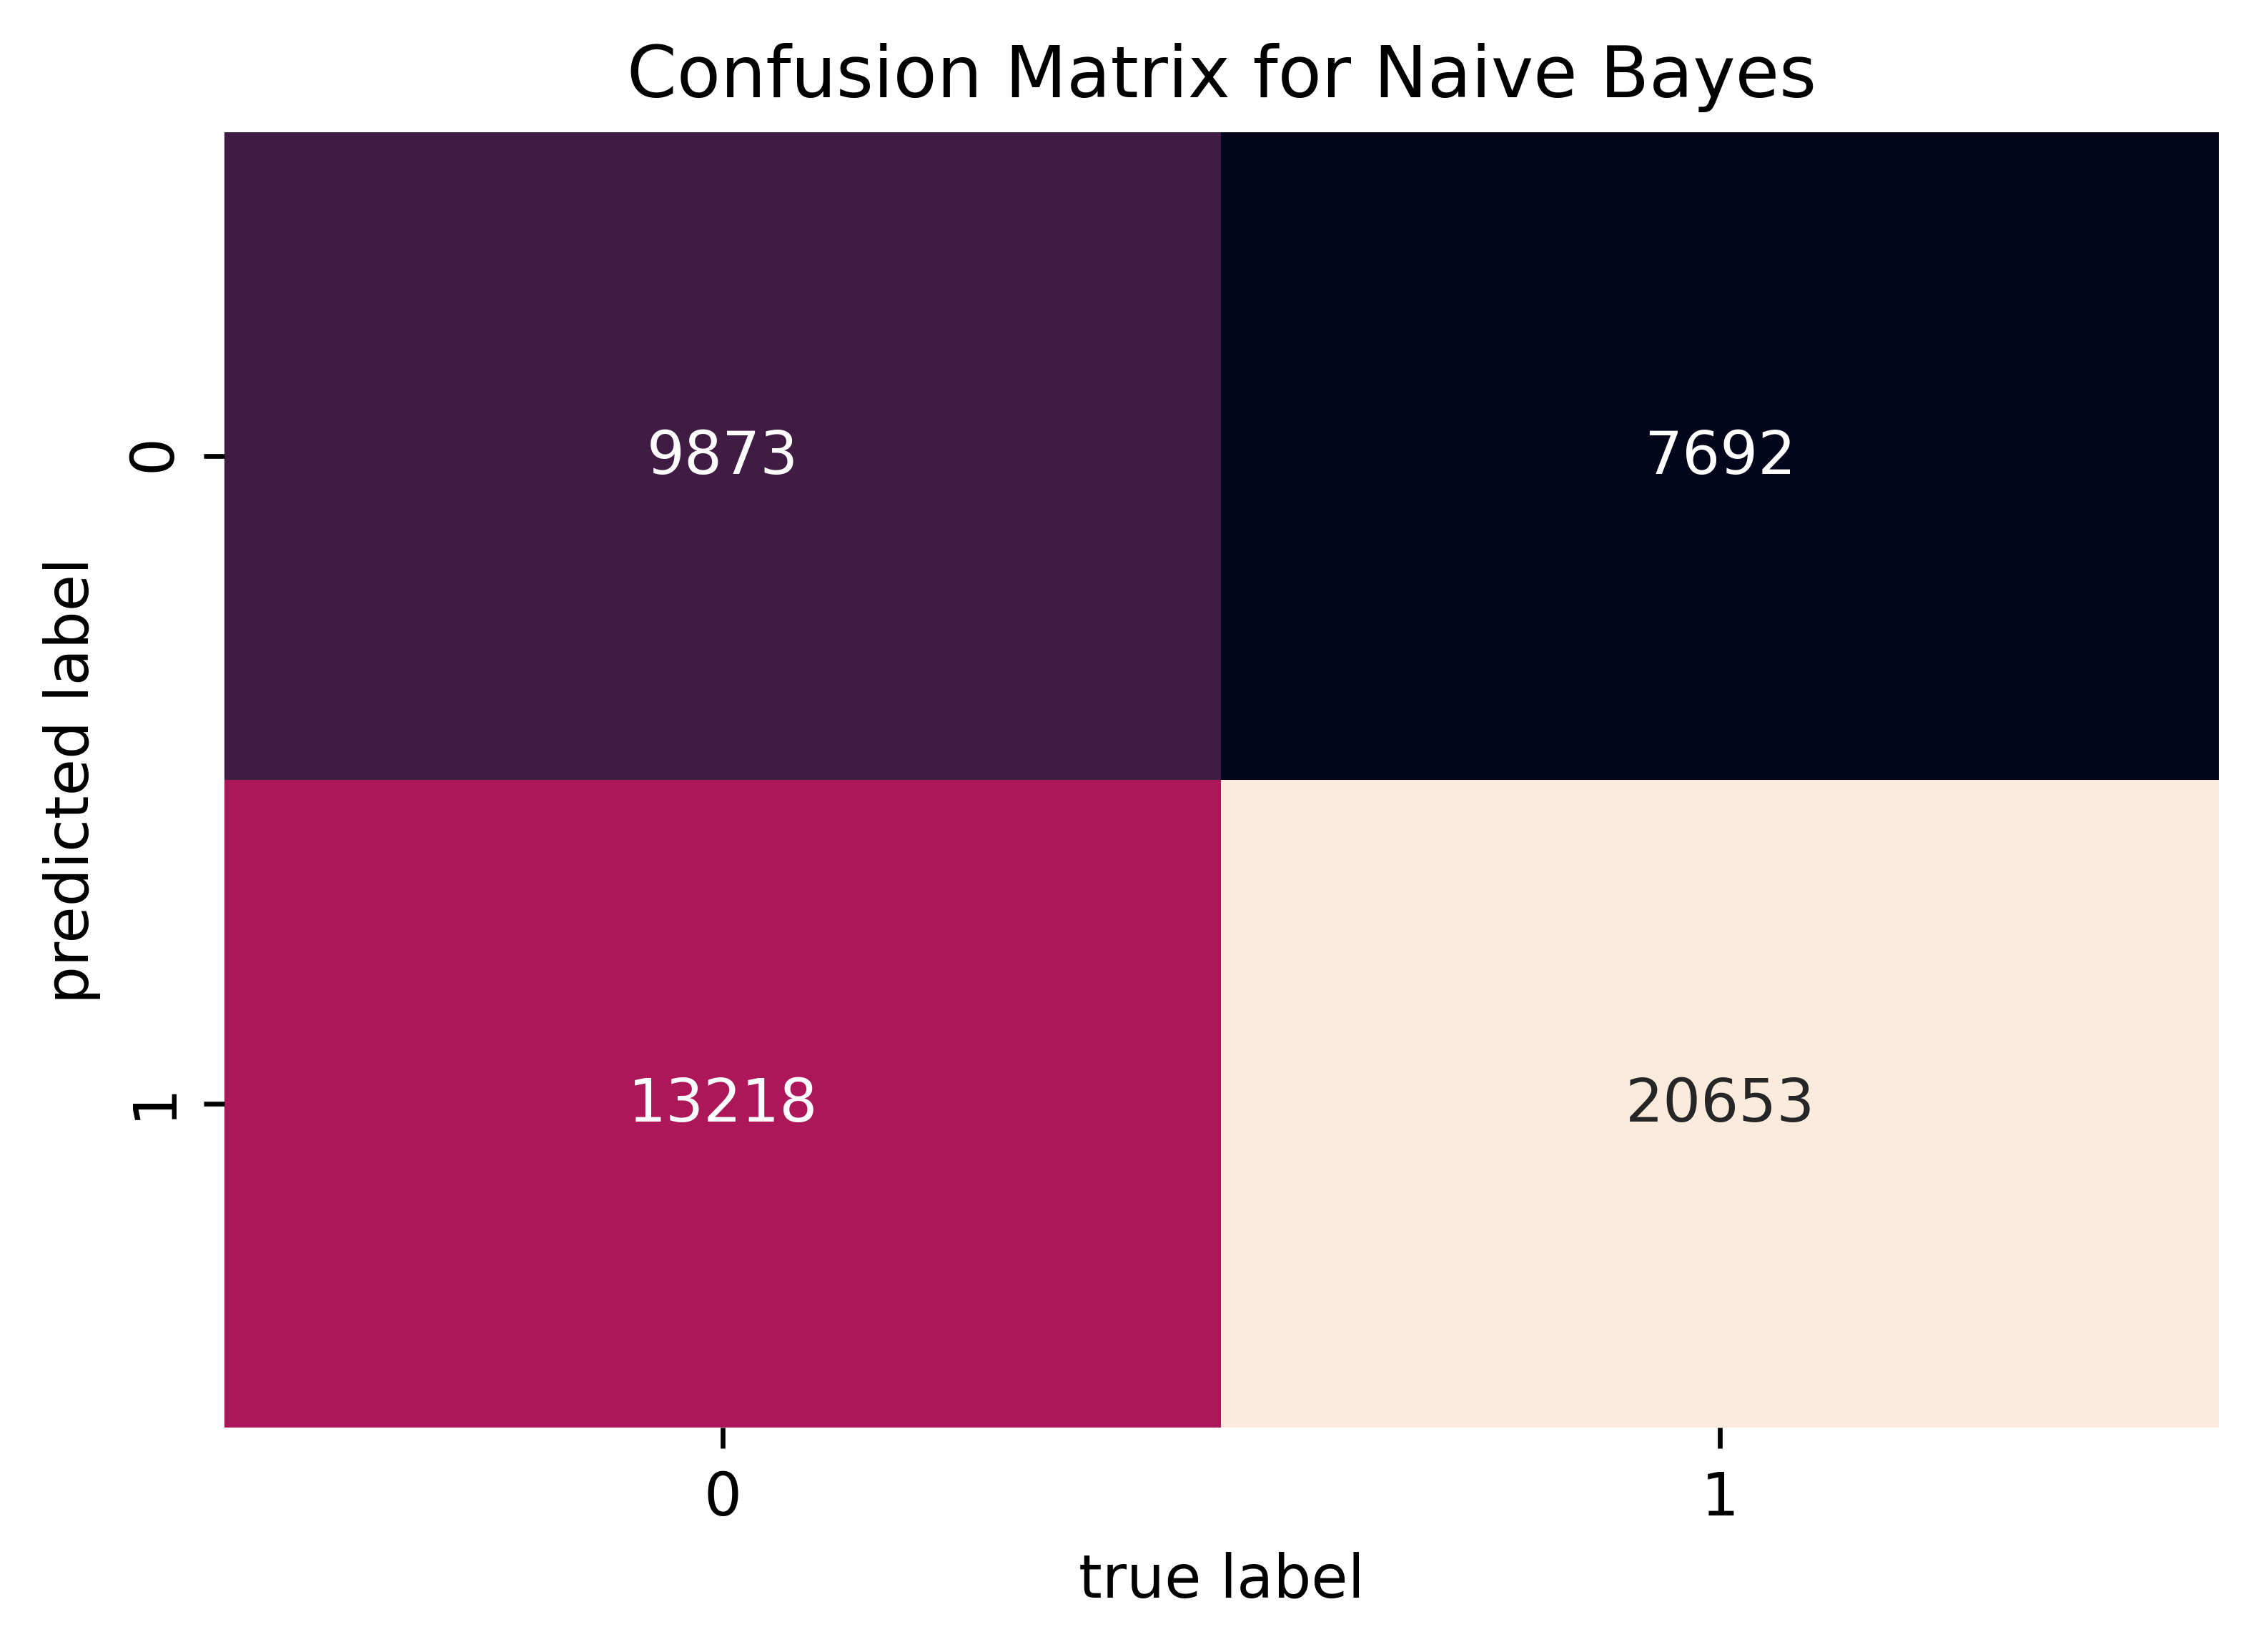

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=600)
mat = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("assets/confusion_matrix.png")
plt.show()